In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import os

In [3]:
cd = os.getcwd()
parent = os.path.dirname(cd)
data_folder = os.path.join(parent, 'data')
data_file = os.path.join(data_folder, 'dev.csv')
df = pd.read_csv(data_file)
df.head()
len(df)

39744

In [4]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df['year'] = df['datetime_utc'].dt.year
df['month'] = df['datetime_utc'].dt.month
df['day'] = df['datetime_utc'].dt.day
df['hour'] = df['datetime_utc'].dt.hour
df['minute'] = df['datetime_utc'].dt.minute
df['second'] = df['datetime_utc'].dt.second
df_no_datetime = df.copy().drop(columns=['datetime_utc'])

#count all NaN values in each column
df_no_datetime.isnull().sum()

#count NaN values in turb_fnu
max_null = df_no_datetime['turb_fnu'].isnull().sum()
print("Percentage of Null values in turb_fnu: ", (max_null/len(df_no_datetime))*100)

#drop all rows with NaN values
df_no_datetime = df_no_datetime.dropna()
df_no_datetime.isnull().sum()

Percentage of Null values in turb_fnu:  6.202194041867955


wtempc             0
atempc             0
winddir_dcfn       0
precp_in           0
relh_pct           0
spc                0
dox_mgl            0
ph                 0
windgust_knots     0
wse1988            0
wvel_fps           0
mbars              0
windspeed_knots    0
par                0
turb_fnu           0
year               0
month              0
day                0
hour               0
minute             0
second             0
dtype: int64

In [27]:
# test Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_datetime)

# test PCA
pca = PCA(n_components=0.7)
X_pca = pca.fit_transform(X_scaled)

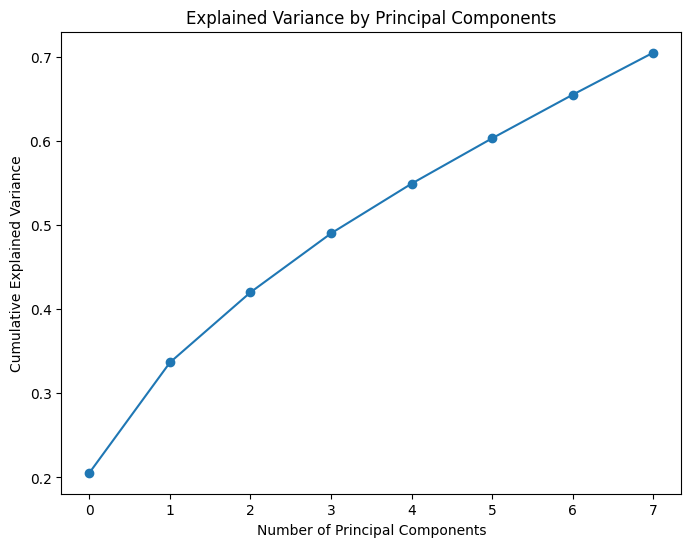

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
# plt.grid(True)
plt.show()

In [29]:
X_pca

array([[ 1.78608422, -1.82894978, -0.575744  , ..., -1.04960866,
        -0.0462197 , -1.5096752 ],
       [ 1.8726874 , -1.78556566, -0.5759222 , ..., -0.97875446,
         0.06527565, -0.62467554],
       [ 1.82536989, -1.96822373, -0.67146383, ..., -1.44200614,
        -0.57620378,  0.28996015],
       ...,
       [ 2.97706359,  1.49651995, -1.68760804, ...,  0.42094183,
         0.59031071, -0.45287877],
       [ 2.93035265,  1.1417835 , -1.72144926, ...,  0.39613993,
         0.49320994,  0.43782008],
       [ 3.00369408,  1.48877156, -1.7601991 , ...,  0.32634257,
         0.4388255 ,  1.33024197]])

In [37]:
len(pca.components_)

8

In [36]:
feature_contributions = pd.DataFrame(pca.components_, columns=df_no_datetime.columns)
print("Feature contributions to the first principal component:")
print(feature_contributions.iloc[0])#.sort_values(ascending=False))

Feature contributions to the first principal component:
wtempc            -0.465453
atempc            -0.441272
winddir_dcfn      -0.026817
precp_in           0.038720
relh_pct          -0.017631
spc                0.138869
dox_mgl            0.469623
ph                 0.305784
windgust_knots     0.107733
wse1988            0.049867
wvel_fps           0.215701
mbars              0.122080
windspeed_knots    0.101518
par               -0.156432
turb_fnu           0.111713
year               0.285483
month             -0.218601
day               -0.016727
hour              -0.020539
minute             0.000195
second             0.000000
Name: 0, dtype: float64


In [39]:
(pca.components_[0])
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

(loadings)

array([[-9.43767788e-01, -1.48033278e-02,  5.08461033e-02,
        -5.01439638e-02, -7.13441381e-02, -1.38038454e-02,
        -9.32200876e-02,  9.03434929e-04],
       [-8.94737169e-01,  1.84234738e-01,  7.81880817e-02,
        -1.00835567e-01, -1.35506160e-01,  3.59455892e-02,
        -6.19913596e-02,  1.39047731e-03],
       [-5.43740983e-02, -1.56951285e-01, -5.04375565e-02,
        -9.19606327e-02,  2.18210328e-01, -3.05326854e-01,
        -3.75162736e-01,  1.45649128e-02],
       [ 7.85105351e-02, -8.39971107e-02,  8.66257597e-03,
        -3.99291313e-01,  2.13894046e-01,  4.64322461e-01,
         3.47292053e-01, -9.63416488e-05],
       [-3.57501233e-02, -6.90465609e-01, -1.00903883e-02,
        -3.36194423e-01,  1.86429028e-01,  6.13716400e-02,
         4.39607510e-02,  5.58231572e-03],
       [ 2.81576315e-01, -1.11591874e-01, -4.12587490e-01,
         5.24505660e-02, -1.01503426e-01,  4.51059770e-01,
        -2.97947697e-01,  1.41774619e-02],
       [ 9.52222249e-01,  1.507719

In [41]:
#make 
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(loadings[0]))], index = df_no_datetime.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
wtempc,-0.943768,-0.014803,0.050846,-0.050144,-0.071344,-0.013804,-0.093220,0.000903
atempc,-0.894737,0.184235,0.078188,-0.100836,-0.135506,0.035946,-0.061991,0.001390
winddir_dcfn,-0.054374,-0.156951,-0.050438,-0.091961,0.218210,-0.305327,-0.375163,0.014565
precp_in,0.078511,-0.083997,0.008663,-0.399291,0.213894,0.464322,0.347292,-0.000096
relh_pct,-0.035750,-0.690466,-0.010090,-0.336194,0.186429,0.061372,0.043961,0.005582
spc,0.281576,-0.111592,-0.412587,0.052451,-0.101503,0.451060,-0.297948,0.014177
dox_mgl,0.952222,0.015077,0.003211,0.058148,0.061355,0.014430,0.073170,-0.001258
ph,0.620019,-0.066316,0.470175,0.155904,0.112847,0.328477,-0.276834,-0.004991
windgust_knots,0.218443,0.820168,0.008474,-0.269662,0.345094,-0.100143,-0.023048,0.003618
wse1988,0.101113,-0.086024,0.347908,-0.455421,-0.156101,0.123600,-0.022897,0.022527


In [54]:
#adding some pcs to the dataframe
df_no_datetime['pc1'] = X_pca[:, 0]
df_no_datetime['pc2'] = X_pca[:, 1]
df_no_datetime['pc3'] = X_pca[:, 2]


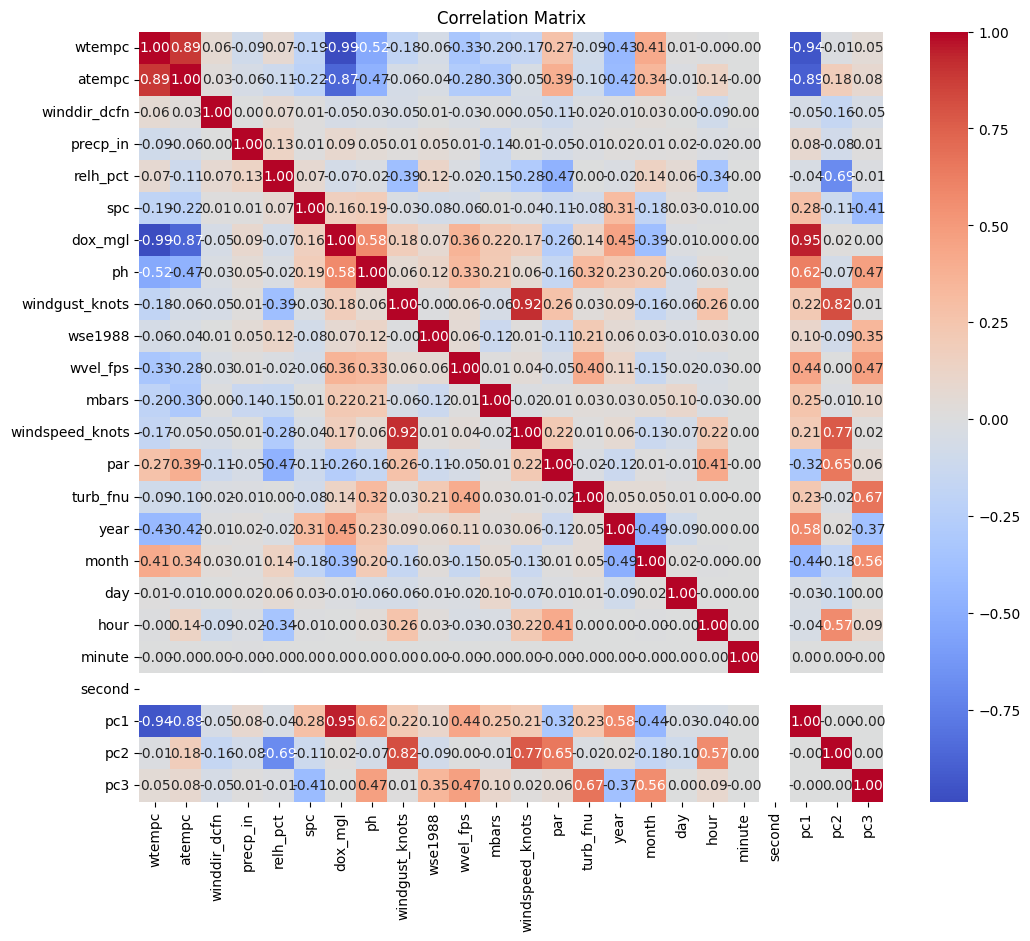